In [127]:
#import libraries
import os
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import numpy as np

In [72]:
#read the original dataset in csv format
rawData = pd.read_csv("heart_failure_clinical_records_dataset.csv") 
rawData.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [73]:
rawData.dtypes #derive datatypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [74]:
rawData.isnull().sum() #check for null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [75]:
rawData.drop_duplicates()  #check and remove duplicates

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000,1.4,140,1,1,280,0


In [76]:
finalData = rawData.reset_index(drop=True) #index reset

In [77]:
finalData #view the dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000,1.4,140,1,1,280,0


Exploratory Data Analysis

<AxesSubplot:xlabel='diabetes', ylabel='count'>

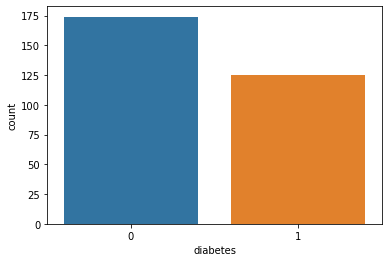

In [78]:
sns.countplot(x = 'diabetes', data = finalData) #get countplot of diabetes and non diabetes 

<AxesSubplot:xlabel='smoking', ylabel='count'>

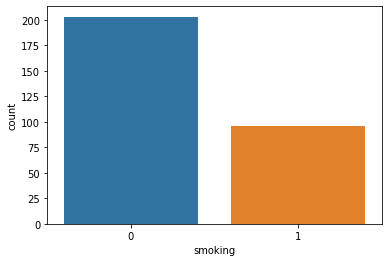

In [9]:
sns.countplot(x = 'smoking', data = finalData) #get countplot of smokers and non smokers

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

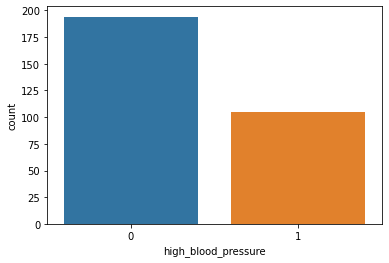

In [79]:
sns.countplot(x = 'high_blood_pressure', data = finalData) #get countplot of high blood pressure and non high blood pressure

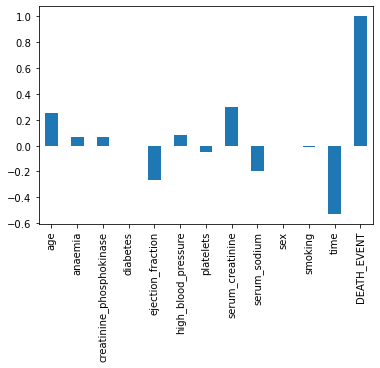

In [80]:
#get correlation for each attribute in relevanve to the target variable(death_event)
Correlation = finalData.corrwith(finalData["DEATH_EVENT"])
Correlation.plot(kind = 'bar')
plt.show()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

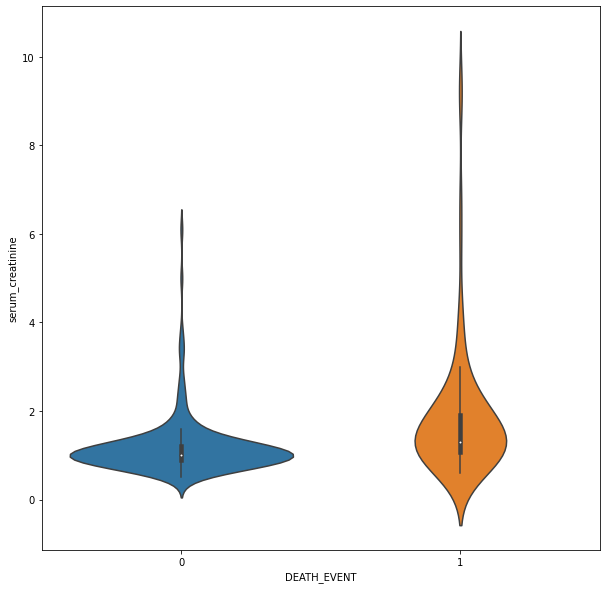

In [81]:
plt.figure(figsize = (10, 10))
sns.violinplot(x = 'DEATH_EVENT', y = 'serum_creatinine', data = finalData)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

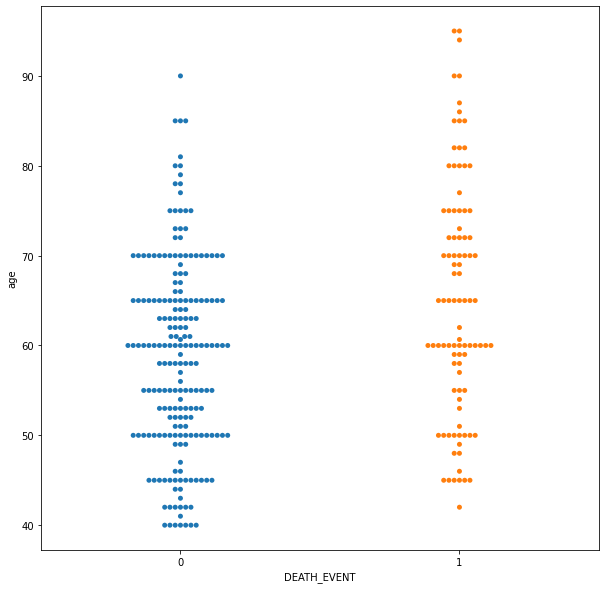

In [82]:
plt.figure(figsize = (10, 10))
sns.swarmplot(x = 'DEATH_EVENT', y = 'age', data = finalData)

<ipython-input-83-c39b4c7a71f7>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  finalData.hist(ax = axis)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

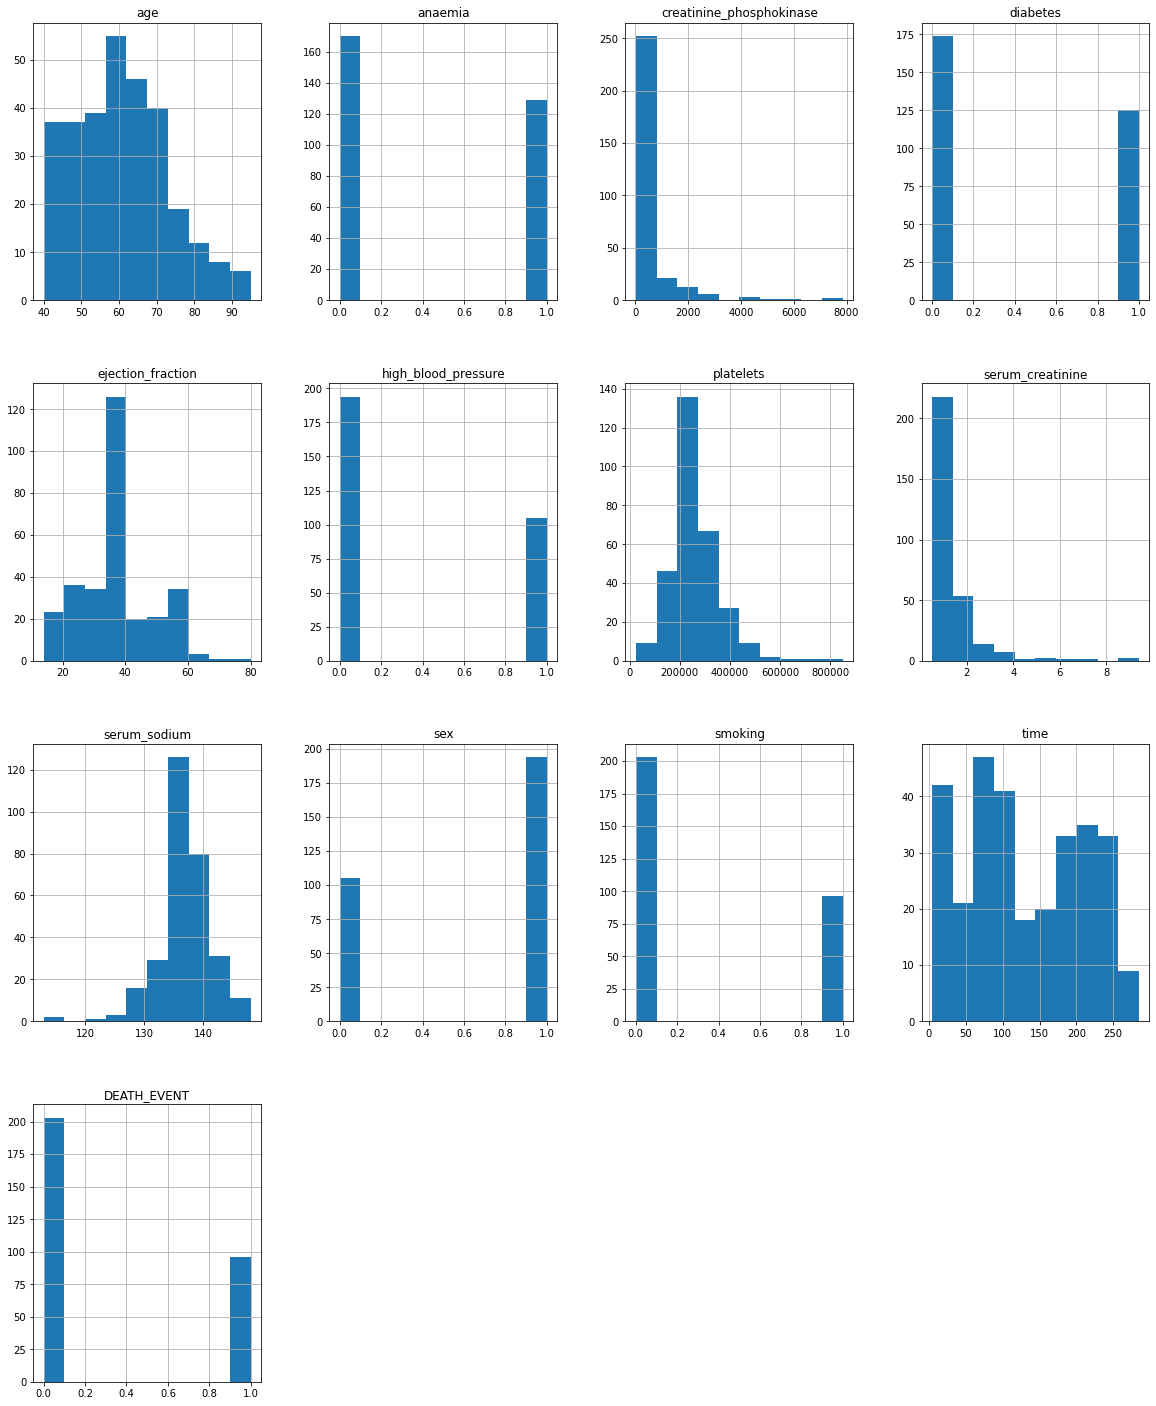

In [83]:
#Checking the distributions of all columns
Figure = plt.figure(figsize = (20, 25))
axis = Figure.gca()
finalData.hist(ax = axis)

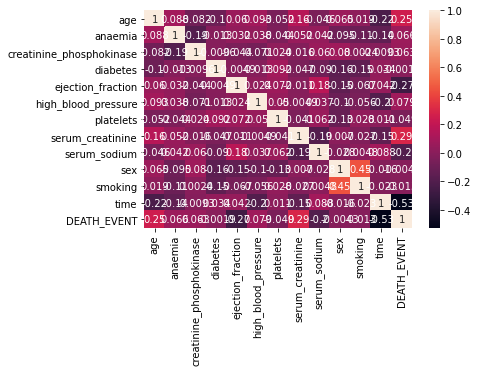

In [87]:
plt.Figure(figsize = (1000, 1000))
sns.heatmap(finalData.corr(), annot = True)
plt.show()

In [104]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range = (0, 1)) 

#assign scaler to column:
finalFeaturedDataScaled = pd.DataFrame(Scaler.fit_transform(finalData), columns = finalData.columns)

In [245]:
Y = finalFeaturedDataScaled['DEATH_EVENT']
X = finalFeaturedDataScaled.drop(['DEATH_EVENT'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [106]:
Y_train

205    0.0
91     0.0
281    0.0
13     1.0
23     0.0
      ... 
71     0.0
278    0.0
218    0.0
223    0.0
271    0.0
Name: DEATH_EVENT, Length: 239, dtype: float64

<h3>Decision Tree</h3>

In [246]:
from sklearn.tree import DecisionTreeClassifier

In [247]:
Classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)

Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [248]:
Y_PredictGini = Classifier.predict(X_test)

In [249]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with decision tree classifier: ', accuracy_score(Y_test, Y_PredictGini))

Model accuracy score with decision tree classifier:  0.7222222222222222


<h3>Logistic Regression</h3>

In [250]:
from sklearn.linear_model import LogisticRegression
LogisticReg = LogisticRegression()
LogisticReg.fit(X_train, Y_train)
Y_Predict_1 = LogisticReg.predict(X_test)


from sklearn import metrics

print('Model accuracy score with logistic regression classifier: ', metrics.accuracy_score(Y_test, Y_Predict_1))
#print(metrics.classification_report(y_test,y_pred)),metrics.confusion_matrix(y_test,y_pred)

Model accuracy score with logistic regression classifier:  0.7333333333333333


<h3>Naive Bayes</h3>

In [251]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
Gaussian = GaussianNB()

#Train the model using the training sets
Gaussian.fit(X_train, Y_train)

#Predict the response for test dataset
Y_Predict_2 = Gaussian.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_Predict_2))

Accuracy: 0.7111111111111111


<h3>K-Neighbors Classifier</h3>

In [252]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

K_Range = range(1,13)
Scores = {}
ScoreList = []

for k in K_Range:
   Classifier = KNeighborsClassifier(n_neighbors = k)
   Classifier.fit(X_train, Y_train)
   Y_Predict_3 = Classifier.predict(X_test)
   Scores[k] = metrics.accuracy_score(Y_test,Y_Predict_3)
   ScoreList.append(metrics.accuracy_score(Y_test,Y_Predict_3))



print("Accuracy:",metrics.accuracy_score(Y_test, Y_Predict_3))

Accuracy: 0.6333333333333333


<h3>RandomForestClassifier</h3>

In [253]:
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier(n_estimators = 50,random_state = 20)
Classifier.fit(X_train, Y_train)

Y_Predict_4 = Classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

 
print("Accuracy:",accuracy_score(Y_test, Y_Predict_4))

Accuracy: 0.7888888888888889


<h3>Support vector classifier</h3>

In [254]:
from sklearn.svm import SVC

SvcModel = SVC(kernel = 'rbf', C = 1, gamma = 0.001, random_state = 1)
SvcModel.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score

Y_Predict_5 = SvcModel.predict(X_test)
print("Accuracy:" ,accuracy_score(Y_test, Y_Predict_5))

Accuracy: 0.5888888888888889


In [256]:
filename = 'HeartFailure_classifier_RF.pkl'
pickle.dump(Classifier, open(filename, 'wb'))

In [257]:
pickle_in = open('HeartFailure_classifier_RF.pkl', 'rb') 
classifier = pickle.load(pickle_in)

R2 - Score of Logistic Regression Model is:  -0.10147883732789387
R2 - Score of Linear Regression Model is:  -0.19326874043855158
R2 - Score of Random Forest Regression Model is:  0.12799592044875074
R2 - Score of Decision Tree Regression Model is:  -0.14737378888322272
R2 - Score of KNN Regression Model is:  -0.514533401325854
R2 - Score of SVM Regression Model is:  -0.6981132075471697


<BarContainer object of 6 artists>

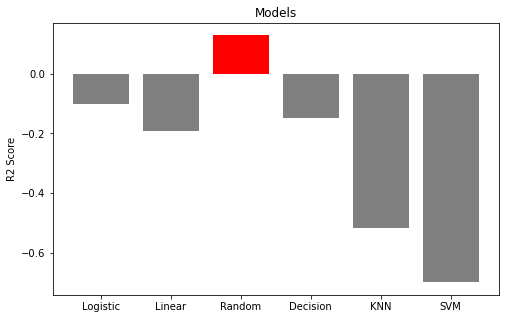

In [255]:
from sklearn.metrics import r2_score

log_R2 = r2_score(Y_test, Y_Predict_1)
naive_R2 = r2_score(Y_test,Y_Predict_2)
random_R2 = r2_score(Y_test,Y_Predict_4)
decision_R2 = r2_score(Y_test,Y_PredictGini)
knn_R2 = r2_score(Y_test,Y_Predict_3)
svm_R2 = r2_score(Y_test,Y_Predict_5)

print('R2 - Score of Logistic Regression Model is: ',log_R2)
print('R2 - Score of Linear Regression Model is: ',naive_R2)
print('R2 - Score of Random Forest Regression Model is: ',random_R2)
print('R2 - Score of Decision Tree Regression Model is: ',decision_R2)
print('R2 - Score of KNN Regression Model is: ',knn_R2)
print('R2 - Score of SVM Regression Model is: ',svm_R2)

models = ('Logistic','Linear','Random','Decision','KNN','SVM')
n = [log_R2,naive_R2,random_R2,decision_R2,knn_R2,svm_R2]
y_pos = np.arange(len(models))
highlights = ['grey' if (x < max(n)) else 'red' for x in n]

plt.figure(figsize=(8,5))
plt.xticks(y_pos,models)
plt.ylabel('R2 Score')
plt.title('Models')
plt.bar(y_pos,n, color = highlights)